# Aviation Accidents Analysis

You are part of a consulting firm that is tasked to do an analysis of commercial and passenger jet airline safety. The client (an airline/airplane insurer) is interested in knowing what types of aircraft (makes/models) exhibit low rates of total destruction and low likelihood of fatal or serious passenger injuries in the event of an accident. They are also interested in any general variables/conditions that might be at play. Your analysis will be based off of aviation accident data accumulated from the years 1948-2023. 

Our client is only interested in airplane makes/models that are professional builds and could potentially still be active. Assume a max lifetime of 40 years for a make/model retirement and make sure to filter your data accordingly (i.e. from 1983 onwards). They would also like separate recommendations for small aircraft vs. larger passenger models. **In addition, make sure that claims that you make are statistically robust and that you have enough samples when making comparisons between groups.**


In this summative assessment you will demonstrate your ability to:
- Use Pandas to load, inspect, and clean the dataset appropriately. 
- Transform relevant columns to create measures that address the problem at hand.
- **conduct EDA: visualization and statistical measures to understand the structure of the data**
- **recommend a set of manufacturers to consider as well as specific airplanes conforming to the client's request**
- **discuss the relationship between serious injuries/airplane damage incurred and at least *two* factors at play in the incident. You must provide supporting evidence (visuals, summary statistics, tables) for each claim you make.**

In [68]:
# loading relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis  
- Load in the cleaned data

In [69]:
accident_data_df = pd.read_csv('data/CleanedAviationData.csv')

accident_data_df.head()

/tmp/ipykernel_113688/4022536735.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  accident_data_df = pd.read_csv('data/CleanedAviationData.csv')


,Unnamed: 0,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,...,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Total.Known,Fatal-Serious-Injuries,Major-Injury-Rate,Aircraft.Destroyed,plane_type
0,0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,Fatal(2),...,0.0,UNK,Cruise,Probable Cause,NaN,2.0,1.0,0.500000,True,STINSON-108-3
1,1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,Fatal(4),...,0.0,UNK,Unknown,Probable Cause,19-09-1996,4.0,1.0,0.250000,True,PIPER-PA24-180
2,2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,NaN,NaN,Fatal(3),...,NaN,IMC,Cruise,Probable Cause,26-02-2007,3.0,1.0,0.333333,True,CESSNA-172M
3,3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,Fatal(2),...,0.0,IMC,Cruise,Probable Cause,12-09-2000,2.0,1.0,0.500000,True,ROCKWELL-112
4,4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,Fatal(1),...,0.0,VMC,Approach,Probable Cause,16-04-1980,3.0,1.0,0.333333,True,CESSNA-501


## Explore safety metrics across models/makes
- Remember that the client is interested in separate recommendations for smaller airplanes and larger airplanes. Choose a passenger threshold of 20 and separate the plane types. 

In [70]:
passenger_threshold = 20

smaller_data = accident_data_df[accident_data_df['Total.Known'] < passenger_threshold]
larger_data = accident_data_df[accident_data_df['Total.Known'] > passenger_threshold]

smaller_data['Total.Known'].value_counts()

Total.Known
1.0     30352
2.0     24094
3.0      7308
4.0      5116
5.0      1587
0.0       948
6.0       914
7.0       467
8.0       245
9.0       175
10.0      147
11.0       88
12.0       76
13.0       58
14.0       51
16.0       49
18.0       41
15.0       30
17.0       25
19.0       24
Name: count, dtype: int64

#### Analyzing Makes

Explore the human injury risk profile for small and larger Makes:
- choose the 15 makes for each group possessing the lowest mean fatal/seriously injured fraction
- plot the mean fatal/seriously injured fraction for each of these subgroups side-by-side

In [71]:
def analyze_risk(data, group):
    risk_profile = data.groupby('Make')['Major-Injury-Rate'].mean().sort_values()
    
    # Select the 15 makes with the lowest mean fatal/seriously injured fraction
    top_15_makes = risk_profile.head(15).reset_index()
    top_15_makes.columns = ['Make', 'Major-Injury-Rate']
    
    top_15_makes['Group'] = group
    
    return top_15_makes

In [72]:
smaller_group = analyze_risk(smaller_data, 'Small Aircraft (<20 Pax)')

smaller_group

,Make,Major-Injury-Rate,Group
0,BOMBARDIER INC,0.016667,Small Aircraft (<20 Pax)
1,BRITISH AEROSPACE,0.031189,Small Aircraft (<20 Pax)
2,AIRBUS INDUSTRIE,0.041538,Small Aircraft (<20 Pax)
3,WACO,0.063326,Small Aircraft (<20 Pax)
4,BOMBARDIER,0.077437,Small Aircraft (<20 Pax)
5,AIRBUS,0.080691,Small Aircraft (<20 Pax)
6,BOEING,0.082277,Small Aircraft (<20 Pax)
7,DEHAVILLAND,0.091872,Small Aircraft (<20 Pax)
8,HELIO,0.092759,Small Aircraft (<20 Pax)
9,SWEARINGEN,0.092921,Small Aircraft (<20 Pax)


In [73]:
larger_group = analyze_risk(larger_data, 'Large Aircraft (>20 Pax)')

larger_group

,Make,Major-Injury-Rate,Group
0,AERO COMMANDER,0.000000,Large Aircraft (>20 Pax)
1,DEHAVILLAND,0.000000,Large Aircraft (>20 Pax)
2,SWEARINGEN,0.000000,Large Aircraft (>20 Pax)
3,HUGHES,0.000000,Large Aircraft (>20 Pax)
4,GULFSTREAM,0.000000,Large Aircraft (>20 Pax)
5,GULFSTREAM AMERICAN,0.000000,Large Aircraft (>20 Pax)
6,GATES LEARJET,0.000000,Large Aircraft (>20 Pax)
7,GRUMMAN,0.000000,Large Aircraft (>20 Pax)
8,MOONEY,0.000000,Large Aircraft (>20 Pax)
9,SIKORSKY,0.000000,Large Aircraft (>20 Pax)


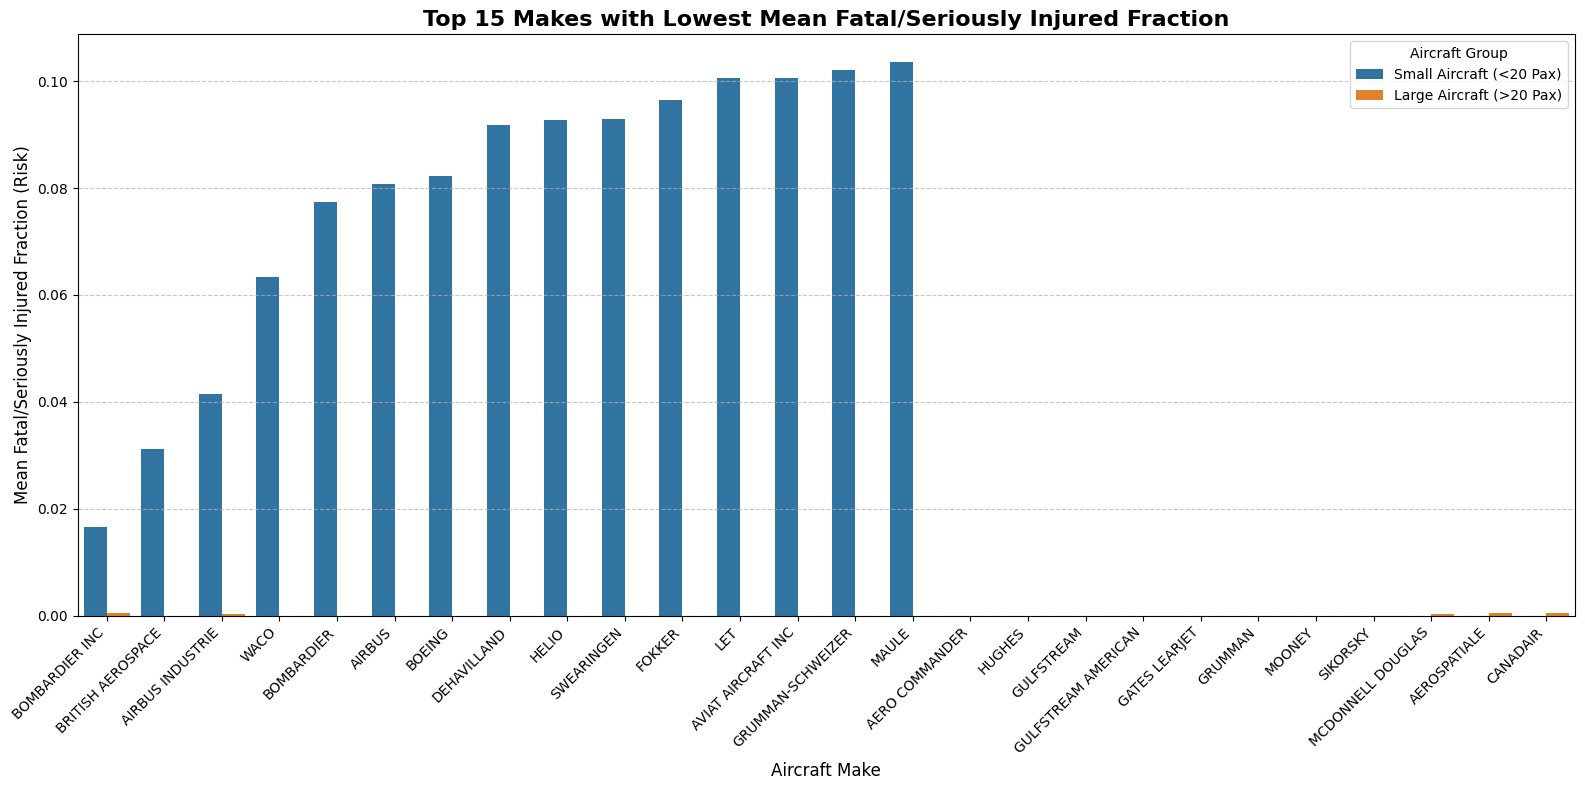

In [74]:
plot_data = pd.concat([smaller_group, larger_group])

# Plotting (using Matplotlib and Seaborn)
plot_data = plot_data.sort_values(by=['Group', 'Major-Injury-Rate'], ascending=[False, True])

plt.figure(figsize=(16, 8))
sns.barplot(
    data=plot_data, 
    x='Make', 
    y='Major-Injury-Rate', 
    hue='Group', 
    palette={'Small Aircraft (<20 Pax)': '#1f77b4', 'Large Aircraft (>20 Pax)': '#ff7f0e'}
)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.title(
    'Top 15 Makes with Lowest Mean Fatal/Seriously Injured Fraction', 
    fontsize=16, 
    fontweight='bold'
)
plt.ylabel('Mean Fatal/Seriously Injured Fraction (Risk)', fontsize=12)
plt.xlabel('Aircraft Make', fontsize=12)
plt.legend(title='Aircraft Group', loc='upper right')
plt.ylim(0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show() # Use plt.show() in your notebook

**Distribution of injury rates: small makes**

Use a violinplot to look at the distribution of the fraction of passengers serious/fatally injured for small airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

In [96]:
small_makes = (smaller_data.groupby('Make')['Major-Injury-Rate'].mean().sort_values().head(10).index)

small_makes

Index(['BOMBARDIER INC', 'BRITISH AEROSPACE', 'AIRBUS INDUSTRIE', 'WACO',
       'BOMBARDIER', 'AIRBUS', 'BOEING', 'DEHAVILLAND', 'HELIO', 'SWEARINGEN'],
      dtype='object', name='Make')

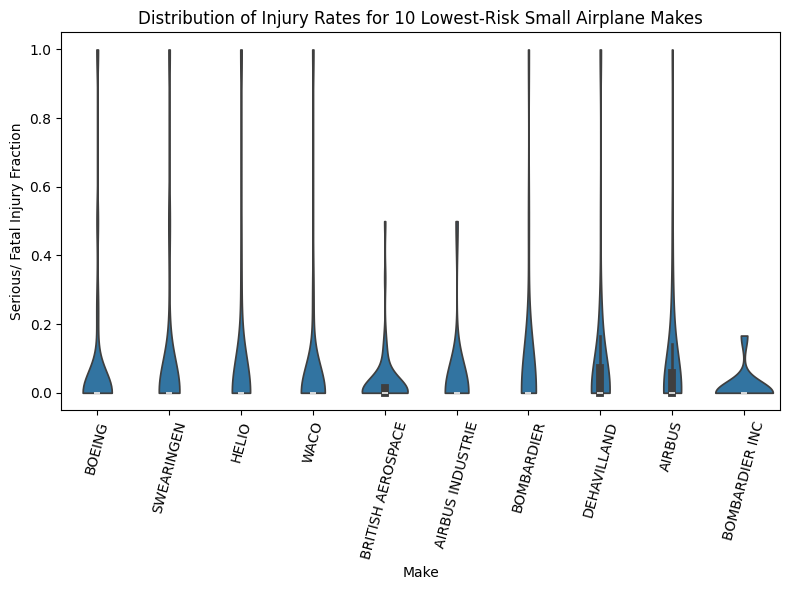

In [97]:
small_low_risk = smaller_data[smaller_data['Make'].isin(small_makes)]

plt.figure(figsize=(8, 6))
sns.violinplot(
    data = small_low_risk,
    x = 'Make',
    y = 'Major-Injury-Rate',
    inner = 'box',
    cut = 0,
)
plt.xticks(rotation = 75)
plt.ylabel('Serious/ Fatal Injury Fraction')
plt.title('Distribution of Injury Rates for 10 Lowest-Risk Small Airplane Makes')
plt.tight_layout()
plt.show()



**Distribution of injury rates: large makes**

Use a stripplot to look at the distribution of the fraction of passengers serious/fatally injured for large airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

In [ ]:
large_makes = (larger_group.groupby('Make')['Major-Injury-Rate'].mean().sort_values().head(10).index)

large_makes

Index(['BOMBARDIER INC', 'BRITISH AEROSPACE', 'AIRBUS INDUSTRIE', 'WACO',
       'BOMBARDIER', 'AIRBUS', 'BOEING', 'DEHAVILLAND', 'HELIO', 'SWEARINGEN'],
      dtype='object', name='Make')

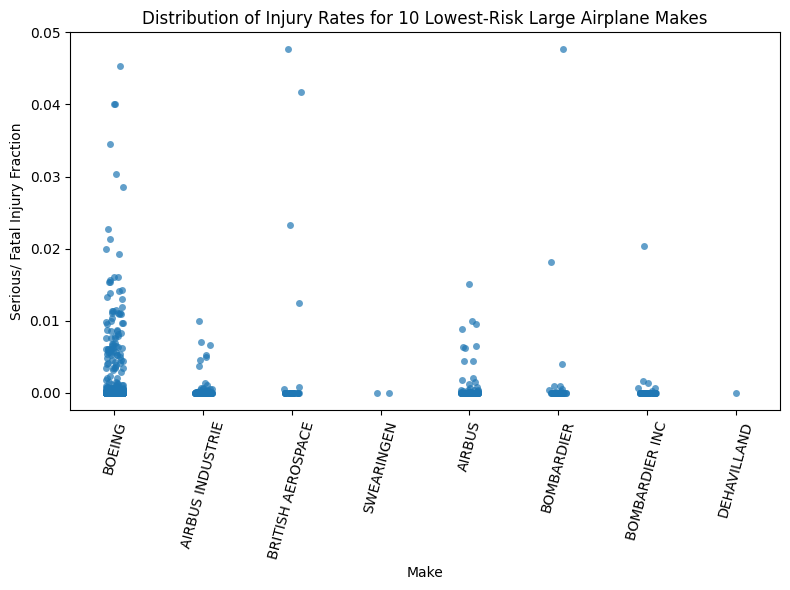

In [92]:
large_low_risk = larger_data[larger_data['Make'].isin(large_makes)]

plt.figure(figsize = (8, 6))
sns.stripplot(
    data = large_low_risk,
    x = 'Make',
    y = 'Major-Injury-Rate',
    alpha = 0.7
)
plt.xticks(rotation = 75)
plt.ylabel('Serious/ Fatal Injury Fraction')
plt.title('Distribution of Injury Rates for 10 Lowest-Risk Large Airplane Makes')
plt.tight_layout()
plt.show()



**Evaluate the rate of aircraft destruction for both small and large aircraft by Make.** 

Sort your results and keep the lowest 15.

In [94]:
smaller_data.groupby('Make')['Aircraft.Destroyed'].mean().sort_values().nsmallest(15)

Make
GRUMMAN ACFT ENG COR-SCHWEIZER    0.017241
AIRBUS                            0.025478
BOMBARDIER                        0.025641
AMERICAN CHAMPION AIRCRAFT        0.037037
AVIAT AIRCRAFT INC                0.038961
DEHAVILLAND                       0.040404
BOMBARDIER INC                    0.045455
DIAMOND AIRCRAFT IND INC          0.054054
FLIGHT DESIGN GMBH                0.060000
ROBINSON HELICOPTER               0.060870
BALLOON WORKS                     0.061224
BOEING                            0.065000
LET                               0.080882
RAVEN                             0.081395
WACO                              0.083916
Name: Aircraft.Destroyed, dtype: float64

In [95]:
larger_data.groupby('Make')['Aircraft.Destroyed'].mean().sort_values().nsmallest(15)

Make
AERO COMMANDER         0.000000
DEHAVILLAND            0.000000
SWEARINGEN             0.000000
HUGHES                 0.000000
GULFSTREAM             0.000000
GULFSTREAM AMERICAN    0.000000
GATES LEARJET          0.000000
GRUMMAN                0.000000
MOONEY                 0.000000
SIKORSKY               0.000000
BOMBARDIER INC         0.022222
AEROSPATIALE           0.029412
CANADAIR               0.047619
BOMBARDIER             0.052632
BOEING                 0.060309
Name: Aircraft.Destroyed, dtype: float64

#### Provide a short discussion on your findings for your summary statistics and plots:
- Make any recommendations for Makes here based off of the destroyed fraction and fraction fatally/seriously injured
- Comment on the calculated statistics and any corresponding distributions you have visualized.


The data strongly confirms the commonly held belief that large commercial aircraft (and their operational environments) are significantly safer than small general aviation aircraft, both in terms of aircraft destruction and the fraction of serious/fatal injuries. It also appears that Grumman produce the planes least likely to be destroyed, being the only company with a <2% chance of being destroyed in an accident, but they are more likely to cause major injuries

### Analyze plane types
- plot the mean fatal/seriously injured fraction for both small and larger planes 
- also provide a distributional plot of your choice for the fatal/seriously injured fraction by airplane type (stripplot, violin, etc)  
- filter ensuring that you have at least ten individual examples in each model/make to average over

**Larger planes**

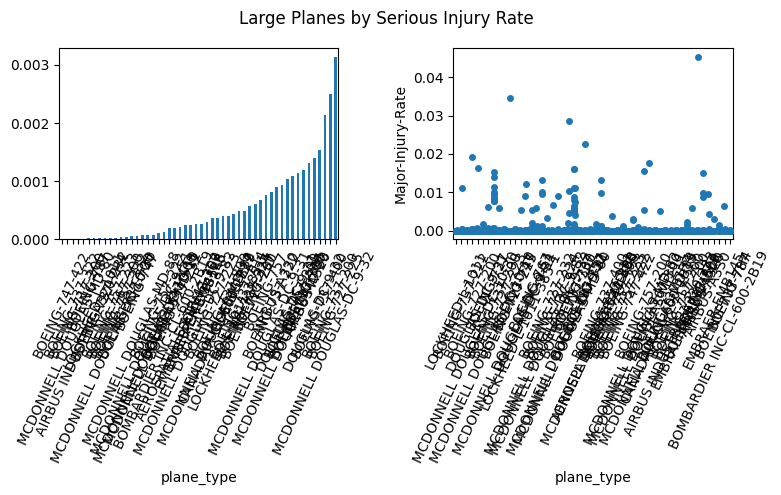

In [101]:
large_plane_counts = larger_data['plane_type'].value_counts() 


large_plane_names = large_plane_counts[large_plane_counts > 10].index 
fltr_large_plane_name = larger_data[larger_data['plane_type'].isin(large_plane_names)]

fig, ax = plt.subplots(1, 2, figsize=(8,5))
fig.suptitle('Large Planes by Serious Injury Rate')
fltr_large_plane_name.groupby('plane_type')['Major-Injury-Rate'].mean().sort_values().plot.bar(ax = ax[0])
sns.stripplot(x = 'plane_type', y = 'Major-Injury-Rate', data = fltr_large_plane_name, ax = ax[1])
ax[0].tick_params(axis='x', rotation=65)
ax[1].tick_params(axis='x', rotation=65)
plt.tight_layout()



**Smaller planes**
- for smaller planes, limit your plotted results to the makes with the 10 lowest mean serious/fatal injury fractions

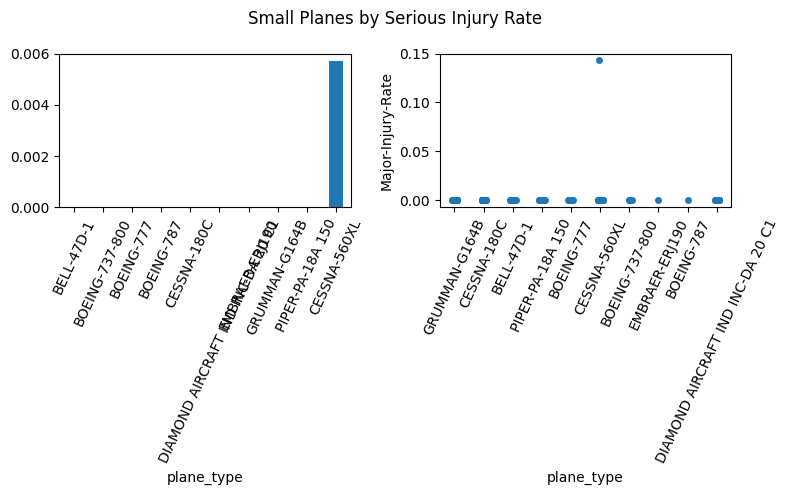

In [104]:
small_plane_counts = smaller_data['plane_type'].value_counts() # get value counts to see distribution


small_plane_names = small_plane_counts[small_plane_counts > 10].index # filter to only include higher than 10 counts
fltr_small_plane_names = smaller_data[smaller_data['plane_type'].isin(small_plane_names)] # make var to store filtered df

lowest10smallplanenames = fltr_small_plane_names.groupby('plane_type')['Major-Injury-Rate'].mean().sort_values().nsmallest(10).index
lowest10smallplanes_df = smaller_data[smaller_data['plane_type'].isin(lowest10smallplanenames)]

fig, ax = plt.subplots(1, 2, figsize=(8,5))
fig.suptitle('Small Planes by Serious Injury Rate')
lowest10smallplanes_df.groupby('plane_type')['Major-Injury-Rate'].mean().sort_values().plot.bar(ax=ax[0])
sns.stripplot(x = 'plane_type', y = 'Major-Injury-Rate', data = lowest10smallplanes_df, ax = ax[1])
ax[0].tick_params(axis='x', rotation=65)
ax[1].tick_params(axis='x', rotation=65)
plt.tight_layout()



### Discussion of Specific Airplane Types
- Discuss what you have found above regarding passenger fraction seriously/ both small and large airplane models.

Cessnas are dangerous and large planes can have a higher injury rate

### Exploring Other Variables
- Investigate how other variables effect aircraft damage and injury. You must choose **two** factors out of the following but are free to analyze more:

- Weather Condition
- Engine Type
- Number of Engines
- Phase of Flight
- Purpose of Flight

For each factor provide a discussion explaining your analysis with appropriate visualization / data summaries and interpreting your findings.

In [107]:
engine_type_ir = accident_data_df.groupby('Engine.Type')['Major-Injury-Rate'].agg(['count', 'mean'])
engine_type_ir


,count,mean
Engine.Type,,
Geared Turbofan,1,0.000000
LR,1,0.022161
NONE,1,0.000000
Reciprocating,58597,0.167296
Turbo Fan,2089,0.020265
Turbo Jet,560,0.077097
Turbo Prop,2872,0.183983
Turbo Shaft,3110,0.174631
Unknown,1522,0.175073


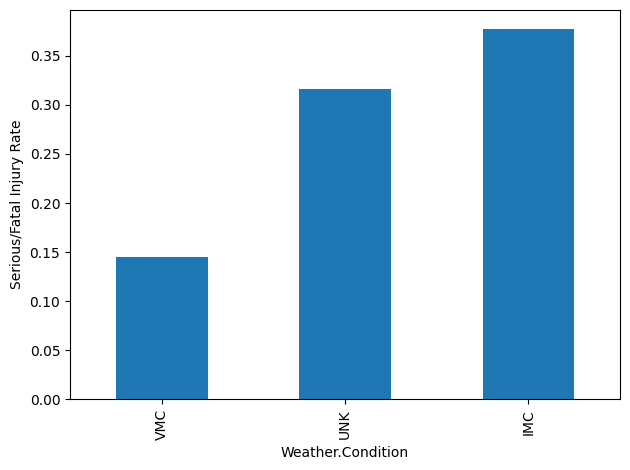

In [105]:
fig, ax = plt.subplots()
accident_data_df.groupby('Weather.Condition')['Major-Injury-Rate'].mean().sort_values().plot.bar(ax=ax)
ax.set_ylabel('Serious/Fatal Injury Rate')
plt.tight_layout()

In [ ]:
"""It appears that worse weather conditions and recriprocating engines are some of the more dangerous situations"""